### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [11]:
import pandas as pd
import yfinance as yf

# Fetch the data for "ADANIPOWER.NS"
df = yf.download("ADANIPOWER.NS")

[*********************100%***********************]  1 of 1 completed


In [12]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS
Date,,,,,
2009-08-20,100.099998,110.000000,98.300003,108.000000,164328256
2009-08-21,103.150002,103.900002,98.000000,99.900002,33717840
2009-08-24,103.099998,104.400002,101.550003,103.900002,13665282
2009-08-25,102.750000,103.150002,101.000000,102.500000,11720267
2009-08-26,105.099998,107.500000,102.849998,103.000000,17158838


In [13]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS
Date,,,,,
2025-01-24,514.849976,528.799988,509.000000,522.549988,4943171
2025-01-27,496.899994,514.849976,493.000000,514.849976,3438956
2025-01-28,497.200012,506.850006,483.149994,497.350006,4693074
2025-01-29,522.750000,527.900024,496.899994,502.950012,7833685
2025-01-30,508.799988,524.500000,505.000000,524.000000,4434757


In [14]:
df1=df.reset_index()['Close']

In [15]:
df1

Ticker,ADANIPOWER.NS
0,100.099998
1,103.150002
2,103.099998
3,102.750000
4,105.099998
...,...
3806,514.849976
3807,496.899994
3808,497.200012
3809,522.750000


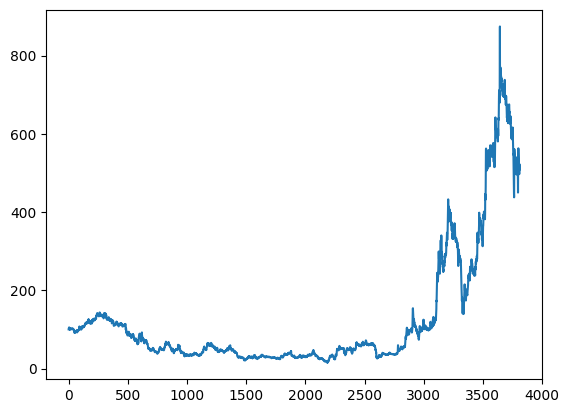

In [16]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [17]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [18]:
import numpy as np

In [19]:
df1

Ticker,ADANIPOWER.NS
0,100.099998
1,103.150002
2,103.099998
3,102.750000
4,105.099998
...,...
3806,514.849976
3807,496.899994
3808,497.200012
3809,522.750000


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
df1

array([[0.09853908],
       [0.10208952],
       [0.10203131],
       ...,
       [0.56079391],
       [0.59053606],
       [0.57429717]])

In [22]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(2477, 1334)

In [24]:
train_data

array([[0.09853908],
       [0.10208952],
       [0.10203131],
       ...,
       [0.04993888],
       [0.05203423],
       [0.0562249 ]])

In [25]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
print(X_train.shape), print(y_train.shape)

(2471, 5)
(2471,)


(None, None)

In [28]:
print(X_test.shape), print(ytest.shape)

(1328, 5)
(1328,)


(None, None)

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


/Users/mayank/Documents/Projects Mayank/Stock-prediction-main/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - val_loss: 0.0123
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8600e-05 - val_loss: 5.1862e-04
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5654e-05 - val_loss: 7.5093e-04
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3112e-05 - val_loss: 6.2586e-04
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2159e-05 - val_loss: 6.4201e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2520e-05 - val_loss: 8.3940e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3523e-05 - val_loss: 6.2702e-04
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1466e-05 - val_loss: 6.1548e-04
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2429e-05 - val_loss: 6.1400e-04
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2213e-05 - val_loss: 5.9751e-04
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1912e-05 - val_

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.18.0'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

65.99543428350243

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

329.9207424601162

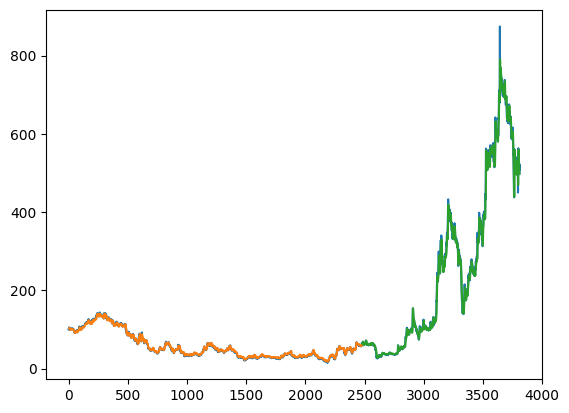

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

1334

In [42]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape


(1, 5)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.5813398238353886,
 0.5604446702523985,
 0.5607939145460721,
 0.5905360573634819,
 0.5742971746396195]

In [45]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=5
i=0
while(i<30):
    
    if(len(temp_input)>5):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.57404447]
6
1 day input [0.56044467 0.56079391 0.59053606 0.57429717 0.57404447]
1 day output [[0.575351]]
2 day input [0.56079391 0.59053606 0.57429717 0.57404447 0.575351  ]
2 day output [[0.5734698]]
3 day input [0.59053606 0.57429717 0.57404447 0.575351   0.57346982]
3 day output [[0.570497]]
4 day input [0.57429717 0.57404447 0.575351   0.57346982 0.57049698]
4 day output [[0.569874]]
5 day input [0.57404447 0.575351   0.57346982 0.57049698 0.56987399]
5 day output [[0.56807977]]
6 day input [0.575351   0.57346982 0.57049698 0.56987399 0.56807977]
6 day output [[0.5662714]]
7 day input [0.57346982 0.57049698 0.56987399 0.56807977 0.56627142]
7 day output [[0.5646669]]
8 day input [0.57049698 0.56987399 0.56807977 0.56627142 0.56466693]
8 day output [[0.56305623]]
9 day input [0.56987399 0.56807977 0.56627142 0.56466693 0.56305623]
9 day output [[0.5613155]]
10 day input [0.56807977 0.56627142 0.56466693 0.56305623 0.56131548]
10 day output [[0.5596412]]
11 day input [0.56627142

In [46]:
day_new=np.arange(1,6)
day_pred=np.arange(6,36)

In [47]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

3811

In [49]:
465-5

460

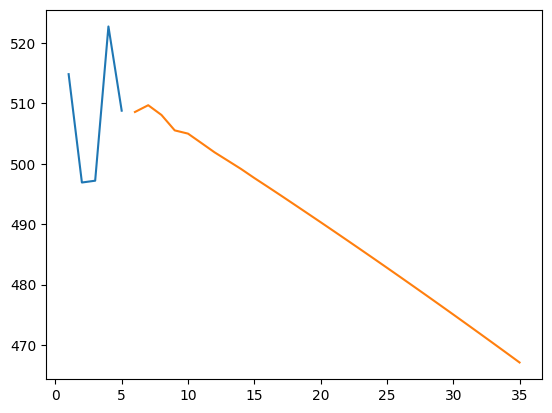

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-time_step:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

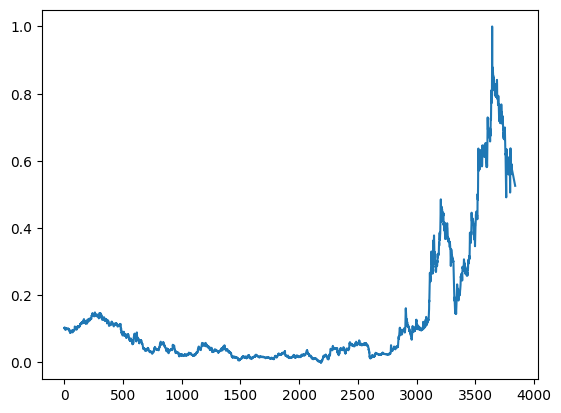

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1:])

In [52]:
df3=scaler.inverse_transform(df3).tolist()

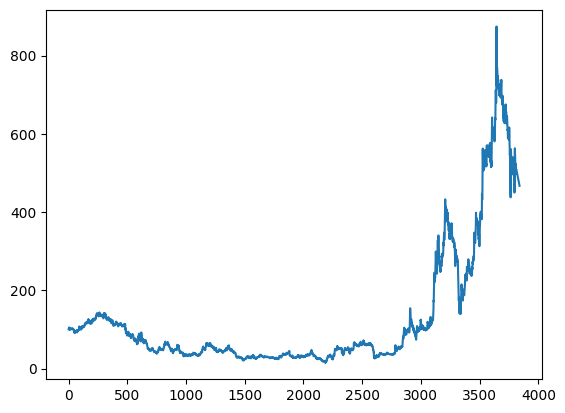

In [53]:
plt.plot(df3)